In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dog_rates_tweets.csv')
data.head()

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...


In [3]:
rating_regex = r'(\d+(\.\d+)?)/10'
data['rating'] = data['text'].str.extract(rating_regex)[0].astype(float)

data_with_ratings = data[data['rating'].notnull()]
data_with_ratings.head()

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0


In [4]:
data_cleaned = data_with_ratings[data_with_ratings['rating'] <= 25]

In [5]:
data_cleaned['created_at'] = pd.to_datetime(data_cleaned['created_at'])


C:\Users\gkz25\AppData\Local\Temp\ipykernel_12320\2480888741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['created_at'] = pd.to_datetime(data_cleaned['created_at'])


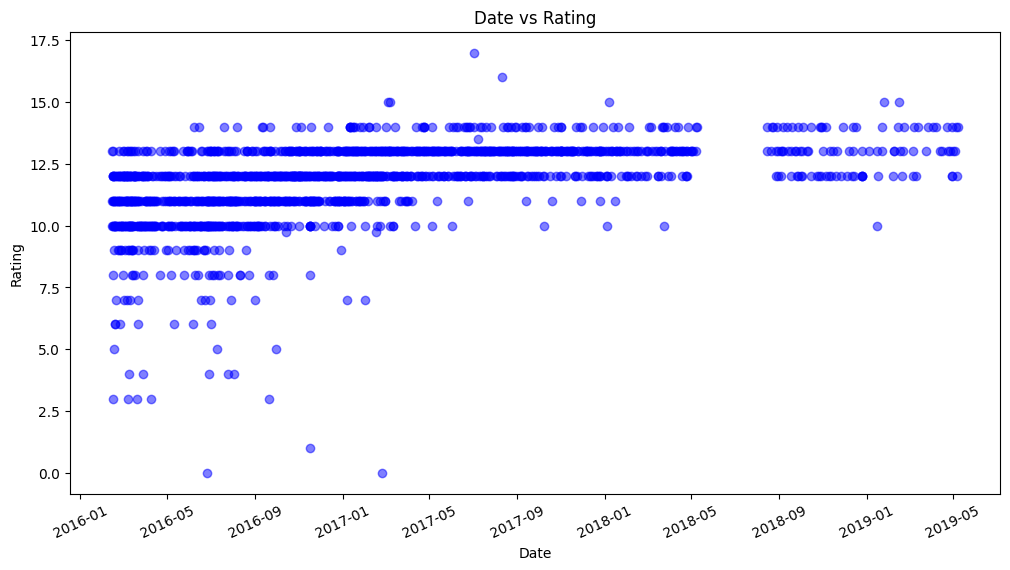

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['created_at'], data_cleaned['rating'], color='b', alpha=0.5)
plt.xticks(rotation=25)
plt.title('Date vs Rating')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

C:\Users\gkz25\AppData\Local\Temp\ipykernel_12320\528019303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['timestamp'] = data_cleaned['created_at'].apply(lambda x: x.timestamp())


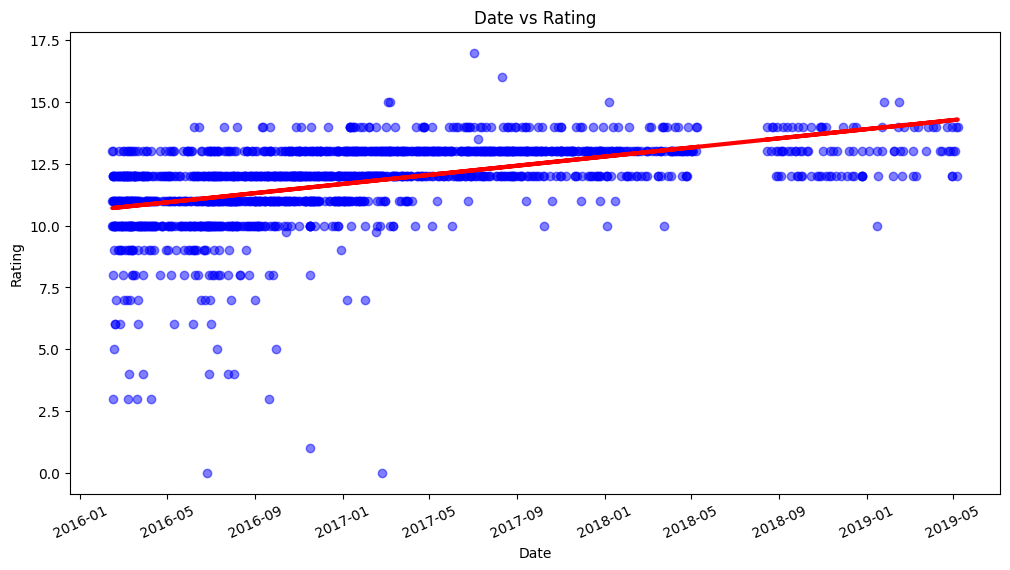

Slope: 3.5159299748477226e-08
Intercept: -40.46415480898918


In [7]:
import scipy.stats as stats

data_cleaned['timestamp'] = data_cleaned['created_at'].apply(lambda x: x.timestamp())

fit = stats.linregress(data_cleaned['timestamp'], data_cleaned['rating'])
slope = fit.slope
intercept = fit.intercept

plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['created_at'], data_cleaned['rating'], color='b', alpha=0.5)
plt.plot(data_cleaned['created_at'], data_cleaned['timestamp']*slope + intercept, 'r-', linewidth=3)
plt.xticks(rotation=25)
plt.title('Date vs Rating')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)